In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("../learningSet.csv")
data.head()

/var/folders/4m/k401q1_d1z3g7xk757s4764c0000gn/T/ipykernel_95027/3220400435.py:5: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../learningSet.csv")


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C
3,8701,BRY,0,CA,95953,,,2801,0,,...,0.0,1,L,4,E,X,X,X,41.0,C
4,8601,,0,FL,33176,,,2001,0,X,...,0.0,1,L,2,F,X,X,X,26.0,A


In [30]:
#Check for null values in the numerical columns

# Select numerical columns
numerical_columns = data.select_dtypes(include=['number']).columns

# Check for missing values in numerical columns
null_counts = data[numerical_columns].isnull().sum()
print(null_counts)

ODATEDW         0
TCODE           0
DOB             0
AGE         23665
NUMCHLD     83026
            ...  
TARGET_B        0
TARGET_D        0
HPHONE_D        0
RFA_2F          0
CLUSTER2      132
Length: 407, dtype: int64


In [31]:
# Cleaning Columns - GEOCODE2
geocode2_null_count = data["GEOCODE2"].isna().sum()
geocode2_value_counts = data["GEOCODE2"].value_counts()

def clean_geocode2(x):
    x = str(x).lower()
    if x.startswith("a"):
        return "A"
    elif x.startswith("b"):
        return "B"
    elif x.startswith("c"):
        return "C"
    elif x.startswith("d"):
        return "D"
    else:
        return "A"

data["GEOCODE2"] = data["GEOCODE2"].apply(clean_geocode2)

In [32]:
# Cleaning Columns - WEALTH1
wealth1_value_counts = data["WEALTH1"].value_counts()
wealth1_null_count = data["WEALTH1"].isna().sum()
data["WEALTH1"] = data["WEALTH1"].fillna(data["WEALTH1"].mean())

In [33]:
# Cleaning Columns - ADI
adi_null_count = data["ADI"].isna().sum()
data1 = data.dropna(subset=['ADI'])

In [34]:

# Cleaning Columns - DMA
dma_null_count = data1["DMA"].isna().sum()
data1["DMA"] = data1["DMA"].astype(int)

/var/folders/4m/k401q1_d1z3g7xk757s4764c0000gn/T/ipykernel_95027/3491194669.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["DMA"] = data1["DMA"].astype(int)


In [35]:
# Cleaning Columns - MSA
msa_null_count = data1["MSA"].isna().sum()
data1["MSA"] = data1["MSA"].astype(int)

/var/folders/4m/k401q1_d1z3g7xk757s4764c0000gn/T/ipykernel_95027/3099973580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["MSA"] = data1["MSA"].astype(int)


/Users/iagogarrido/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


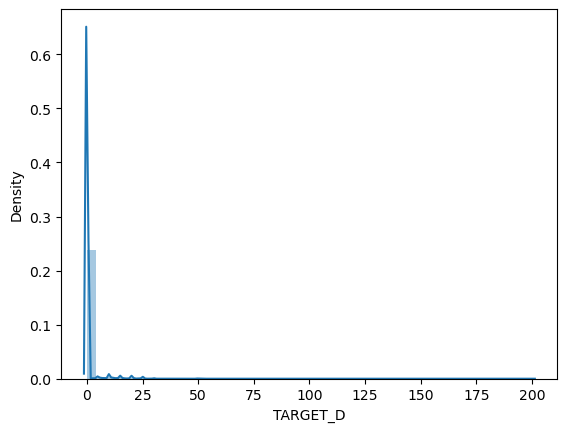

/Users/iagogarrido/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


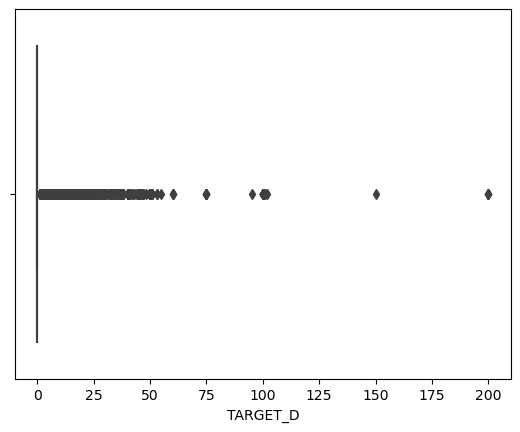

/Users/iagogarrido/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


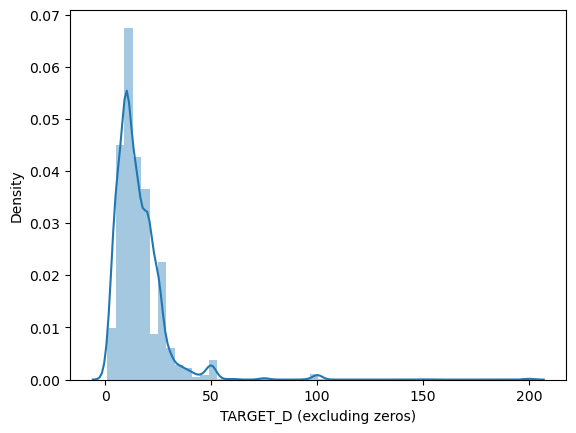

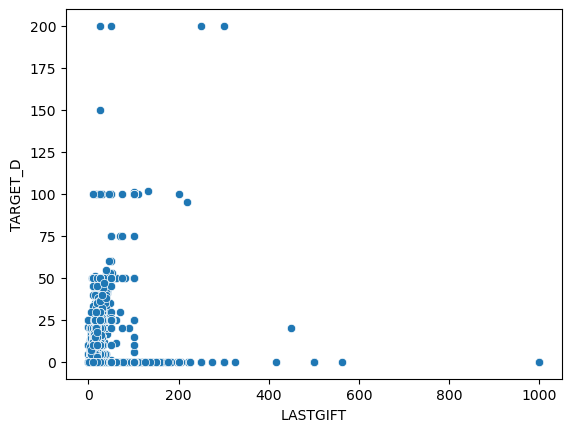

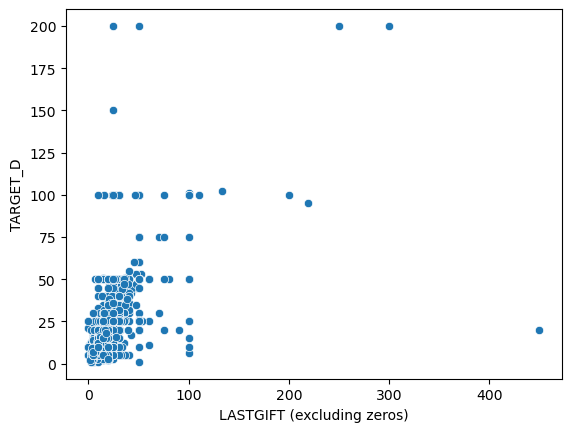

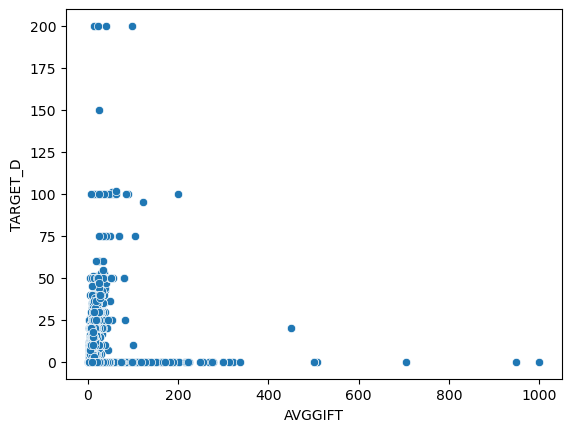

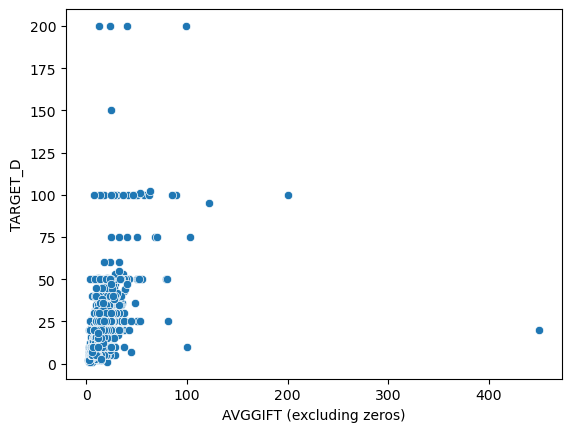

In [36]:
# Exploratory Data Analysis (EDA)
sns.distplot(data1["TARGET_D"])
plt.xlabel("TARGET_D")
plt.ylabel("Density")
plt.show()

correlations = data1.corr()['TARGET_D'].sort_values(ascending=False)

sns.boxplot(data1["TARGET_D"])
plt.xlabel("TARGET_D")
plt.show()

data_no_zero = data1[data1['TARGET_D'] != 0]
sns.distplot(data_no_zero["TARGET_D"])
plt.xlabel("TARGET_D (excluding zeros)")
plt.ylabel("Density")
plt.show()

sns.scatterplot(x=data1['LASTGIFT'], y=data1['TARGET_D'])
plt.xlabel("LASTGIFT")
plt.ylabel("TARGET_D")
plt.show()

sns.scatterplot(x=data_no_zero['LASTGIFT'], y=data_no_zero['TARGET_D'])
plt.xlabel("LASTGIFT (excluding zeros)")
plt.ylabel("TARGET_D")
plt.show()

sns.scatterplot(x=data1['AVGGIFT'], y=data1['TARGET_D'])
plt.xlabel("AVGGIFT")
plt.ylabel("TARGET_D")
plt.show()

sns.scatterplot(x=data_no_zero['AVGGIFT'], y=data_no_zero['TARGET_D'])
plt.xlabel("AVGGIFT (excluding zeros)")
plt.ylabel("TARGET_D")
plt.show()